<a href="https://colab.research.google.com/github/Atarazona11/INST-414/blob/main/Assignment_4_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn.cluster import KMeans

In [1]:
import json
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter

from scipy.sparse import lil_matrix

from sklearn.neighbors import DistanceMetric

from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances

In [3]:
# Want to import the file from my downloads
from google.colab import files
uploaded = files.upload()

Saving country_wise_latest.csv to country_wise_latest.csv


In [6]:
# Open the CSV file to see how it looks.
df = pd.read_csv('country_wise_latest.csv')

df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
print(df.isnull().sum())
df = df.dropna()
df.shape

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


(187, 15)

ValueError: ignored

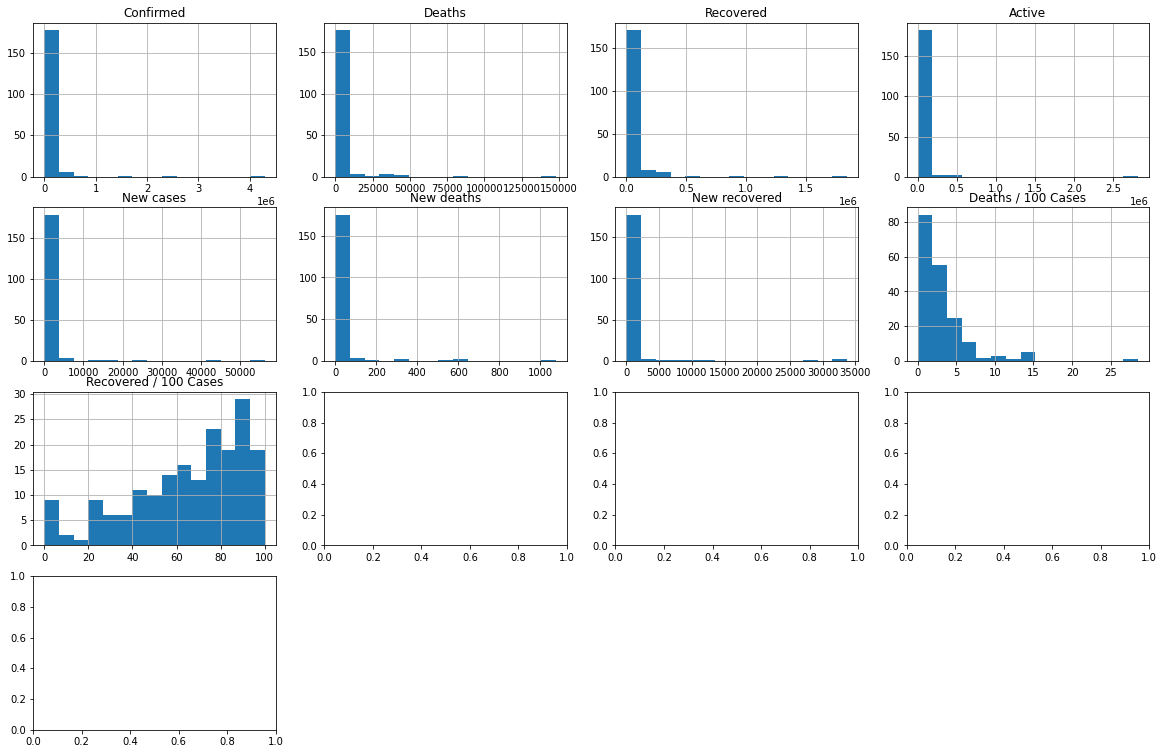

In [19]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
df[num_cols].hist(bins=15, figsize=(20,13), layout=(4,4))

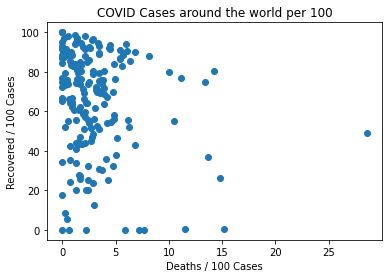

In [60]:
plt.scatter(df['Deaths / 100 Cases'], df['Recovered / 100 Cases'])
plt.title("COVID Cases around the world per 100")
plt.xlabel("Deaths / 100 Cases")
plt.ylabel("Recovered / 100 Cases")
plt.show()

In [69]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Deaths / 100 Cases','Recovered / 100 Cases']])
    sse.append(km.inertia_)

[130753.36400320855, 39216.161890441355, 18864.49934695127, 11644.064805855127, 7461.734430590903, 5745.44629292078, 4833.050659749899, 3994.248533702726, 3344.7093228840126]


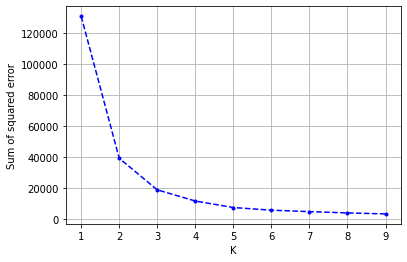

In [70]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
print(sse)
plt.grid()
plt.plot(k_rng, sse, linestyle='--', marker='.', color='b')

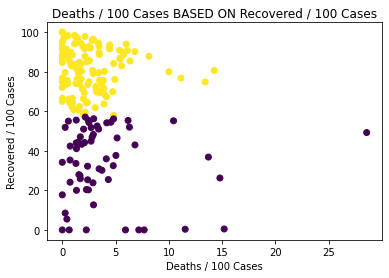

In [71]:
km = KMeans(n_clusters=2)
yp = km.fit(df[['Deaths / 100 Cases','Recovered / 100 Cases']])
cluster = km.labels_
plt.scatter(df['Deaths / 100 Cases'],df['Recovered / 100 Cases'],c=cluster)
plt.title("Deaths / 100 Cases BASED ON Recovered / 100 Cases")
plt.xlabel("Deaths / 100 Cases")
plt.ylabel("Recovered / 100 Cases")
plt.show()

In [53]:
df.Recovered.describe()

count    1.870000e+02
mean     5.063148e+04
std      1.901882e+05
min      0.000000e+00
25%      6.265000e+02
50%      2.815000e+03
75%      2.260600e+04
max      1.846641e+06
Name: Recovered, dtype: float64

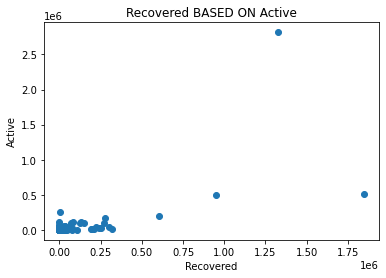

In [64]:
plt.scatter(df['Recovered'],df['Active'])
plt.title("Recovered BASED ON Active")
plt.xlabel("Recovered")
plt.ylabel("Active")
plt.show()

In [77]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Recovered','Active']])
    sse.append(km.inertia_)

[15192406292855.914, 5165394492731.342, 1590137383376.3423, 927697136164.03, 354946473707.8597, 250738668461.35968, 158313985166.66006, 115308672318.06918, 86284375672.07642]


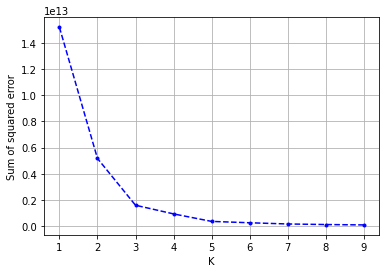

In [78]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
print(sse)
plt.grid()
plt.plot(k_rng, sse, linestyle='--', marker='.', color='b')

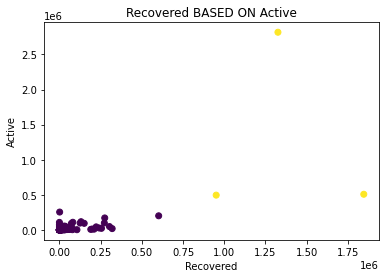

In [79]:
km = KMeans(n_clusters=2)
yp = km.fit(df[['Recovered','Active']])
cluster = km.labels_
plt.scatter(df['Recovered'],df['Active'],c=cluster)
plt.title("Recovered BASED ON Active")
plt.xlabel("Recovered")
plt.ylabel("Active")
plt.show()